# Lab 3: Finding Primitives

## Objective

In this lab, you will implement and visualize three fundamental computer vision primitives:

* Harris Corner Detection – to detect corner points in an image.

* Canny Edge Detection – to detect edges using gradient-based filtering.

* Hough Line Transform – to detect straight lines from an edge map.

These techniques are foundational for many higher-level vision tasks such as object detection, image stitching, and shape analysis.

Some keywords to calrify
- Keypoints
- Features
- Keypoint features
- Interest points
- Correspondences

## 1. Canny Edge Detection

Canny edge detection consists of multiple steps:
1. Noise reduction using Gaussian filter.
2. Gradient calculation in the x and y directions.
3. Non-maximum suppression to thin out edges.
4. Double thresholding and edge tracking by hysteresis.

References:
- https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html?ref=blog.roboflow.com
- https://en.wikipedia.org/wiki/Canny_edge_detector

### OpenCV Canny Edge Detection
Here, we will use OpenCV's built-in `cv2.Canny()` function for edge detection.

Key Parameters:

* threshold1 → Lower threshold for edge linking.

* threshold2 → Upper threshold for strong edges.

In [1]:
# Import libraries

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
img_path = 'assets/3d_drawings.jpg'

img = cv.imread(img_path)

assert img is not None, "file could not be read, check with os.path.exists"


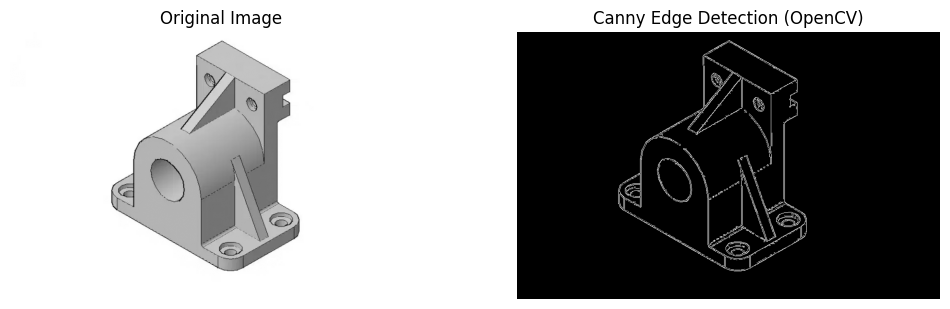

In [3]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(img_gray, 50, 200, L2gradient= 1) 
# parameters are threshold1 and threshold2, L2gradient determines which function to use for calculating the gradient

# Displaying using matplotlib
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1),plt.imshow(img_gray,'gray')
plt.title('Original Image')
plt.axis("off")
plt.subplot(1,2,2),plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection (OpenCV)')
plt.axis("off")
plt.show()

### Check with different thresholding values!

### Calculate the gradients from scratch using sobel filter

In [4]:
kernel_x = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]], dtype=np.float32)

kernel_y = np.array([[-1, -1, -1],
                     [ 0,  0,  0],
                     [ 1,  1,  1]], dtype=np.float32)

def conv2d(image, kernel):
    # image: HxW (grayscale), kernel: kxk
    k = kernel.shape[0]                       # Size of kernel (assumed square)
    pad = k // 2                              # Number of pixels to pad on each side
    padded = np.pad(image, ((pad,pad),(pad,pad)), mode='reflect')

    # Creates an empty output image (same size as original).
    out = np.zeros_like(image, dtype=np.float32)

    # --------------Convolution--------------------

    # Convolution (mathematically) requires flipping the kernel horizontally and vertically before applying it.
    # If you skip this, you’re doing cross-correlation, not convolution.
    kflip = np.flipud(np.fliplr(kernel)).astype(np.float32)
    
    for i in range(image.shape[0]):                     # Loop over rows
        for j in range(image.shape[1]):                 # Loop over columns
            region = padded[i:i+k, j:j+k]               # Extract local patch from padded image
            out[i,j] = np.sum(region * kflip)           # Multiply + sum → convolution result
    return np.clip(out, 0, 255).astype(np.uint8)        # np.clip → ensures pixel values stay in [0, 255].


In [5]:
img_path = 'assets/3d_drawings.jpg'

img = cv.imread(img_path)

assert img is not None, "file could not be read, check with os.path.exists"

# change to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_gray = img_gray.astype(np.float32)  # convert to float for precision

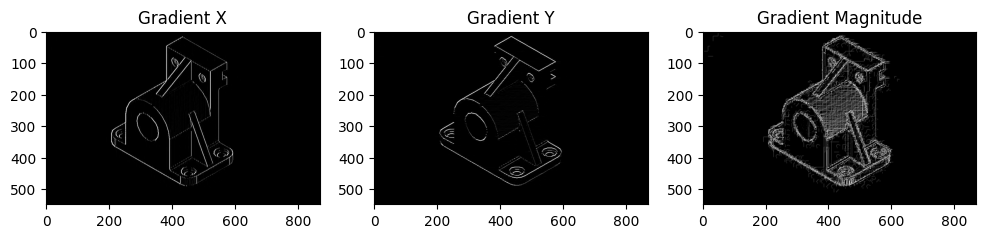

In [6]:
grad_x = conv2d(img_gray, kernel_x)
grad_y = conv2d(img_gray, kernel_y)
magnitude = np.sqrt(grad_x**2 + grad_y**2)
magnitude = (magnitude / magnitude.max() * 255).astype(np.uint8)  # normalize to 0-255

plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(grad_x, cmap='gray'); plt.title('Gradient X')
plt.subplot(1,3,2); plt.imshow(grad_y, cmap='gray'); plt.title('Gradient Y')
plt.subplot(1,3,3); plt.imshow(magnitude, cmap='gray'); plt.title('Gradient Magnitude')
plt.show()

## 2. Harris Corner Detection

Harris corner detection identifies corners by analyzing the gradients of the image in different directions. It uses the following steps:
1. Compute the image gradients. $$I_x , I_y$$
2. Compute the products of gradients at every pixel. $$Ix^2, Iy^2, and Ix*Iy$$
3. Form the Harris matrix and compute the response at each pixel.
4. Apply thresholding to identify corners.


References:
- https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html
- https://en.wikipedia.org/wiki/Harris_corner_detector

### OpenCV Harris Corner Detection
Here, we will use OpenCV's built-in `cv2.cornerHarris()` function to detect corners.


Theory
* Detects corners by measuring changes in intensity in all directions.

* Based on eigenvalues of the gradient covariance matrix.

* A high response means a significant change in intensity in both X and Y directions → corner.

Key Parameters:

* blockSize → Neighborhood size for corner detection.

* ksize → Sobel operator aperture size.

* k → Harris detector free parameter (typically 0.04 - 0.06).

In [ ]:
# Read an image:

img_path_local = 'assets/chessboard.jpg'
# Load BGR (OpenCV default)
img_bgr = cv.imread(img_path_local)

assert img_bgr is not None, "File not found, check the path"
cv.imshow('BGR Image', img_bgr)
cv.waitKey(0)
cv.destroyAllWindows()

(np.float64(-0.5), np.float64(999.5), np.float64(1079.5), np.float64(-0.5))

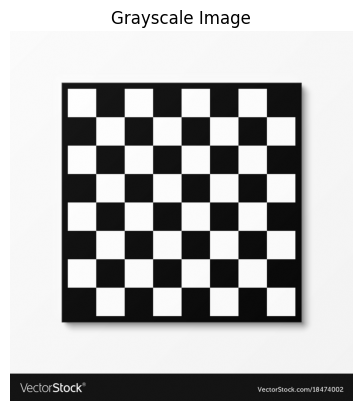

In [ ]:
#  Convert to grayscale
img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY).astype(np.float32)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

(np.float64(-0.5), np.float64(999.5), np.float64(1079.5), np.float64(-0.5))

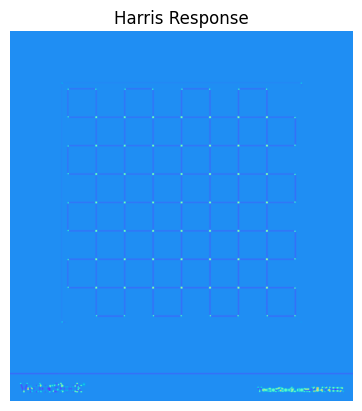

In [ ]:
# Lets calculate the harris response
# Harris Corner Detection

harris_response = cv.cornerHarris(img_gray, blockSize=5, ksize=3, k=0.04)
# blockSize (neighborhood), ksize (Sobel aperture), k (Harris free param)

plt.imshow(harris_response, cmap='rainbow')
plt.title('Harris Response')
plt.axis('off')

In [ ]:
harris_response.max(), harris_response.min()

(np.float32(291518620.0), np.float32(-68984150.0))

(np.float64(-0.5), np.float64(999.5), np.float64(1079.5), np.float64(-0.5))

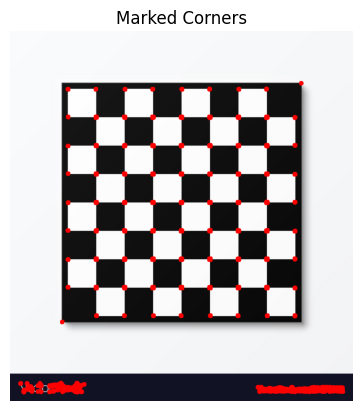

In [ ]:
# harris_response is the output of the Harris corner detector.

# Lets dilate the response to mark corners
kernel = np.ones((5, 5), np.uint8)  # bigger kernel = bigger dots
harris_response_dilated = cv.dilate(harris_response, kernel)

# Threshold
# Only pixels stronger than this threshold are considered as corners.

th = 0.1 * harris_response_dilated.max()  # adjust if too sparse/dense

# You can adjust 0.1 to get fewer or more corners (higher threshold = fewer corners).

# Copy original image to mark corners
marked_bgr = img_bgr.copy()

# Mark corners as filled circles

# 1. Get coordinates of pixels above the threshold
coords = np.argwhere(harris_response_dilated > th)  # returns (y, x)

# 2. Draw circles at these coordinates
for y, x in coords:
    cv.circle(marked_bgr, (x, y), radius=3, color=(0, 0, 255), thickness=-1)

marked_rgb = cv.cvtColor(marked_bgr, cv.COLOR_BGR2RGB)
plt.imshow(marked_rgb)
plt.title('Marked Corners')
plt.axis('off')


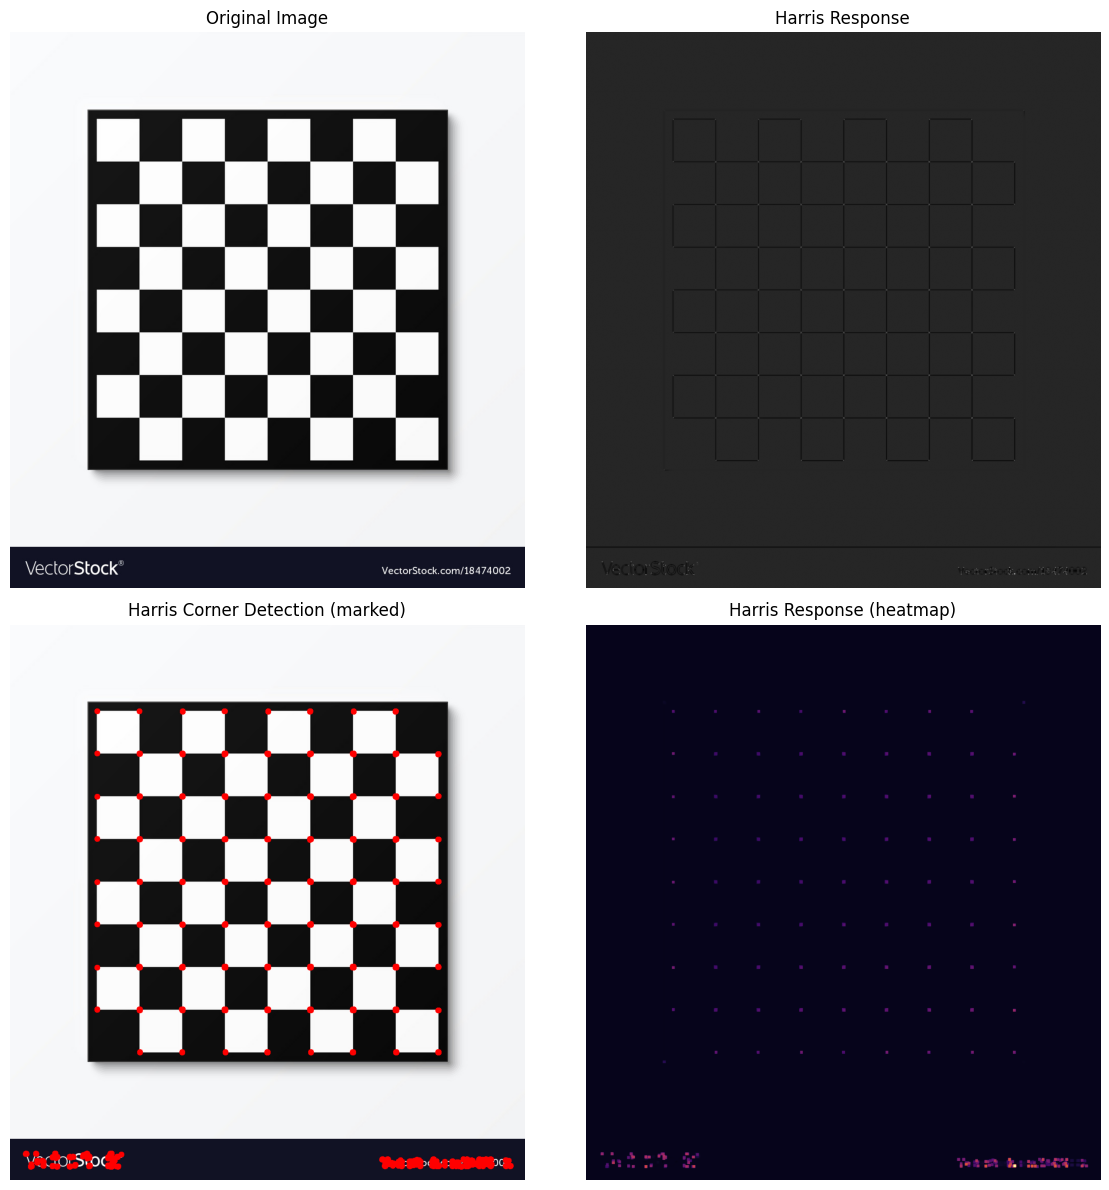

In [ ]:
# Lets combine all the steps in a single code block
# OpenCV Implementation

#If you are using the local machine
img_path_local = 'assets/chessboard.jpg'

# Load BGR (OpenCV default)
img_bgr = cv.imread(img_path_local)
assert img_bgr is not None, "file could not be read, check with os.path.exists"

# Keep copies
orig_bgr = img_bgr.copy()
work_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY).astype(np.float32)

# Harris Corner Detection
# blockSize=2 (neighborhood), ksize=3 (Sobel aperture), k=0.04 (Harris free param)
harris_response = cv.cornerHarris(work_gray, blockSize=2, ksize=3, k=0.04)

# Dilate to make corner responses more visible
kernel = np.ones((5, 5), np.uint8)  # bigger kernel = bigger dots
harris_dilated = cv.dilate(harris_response, kernel)

# Threshold
th = 0.1 * harris_dilated.max()  # adjust if too sparse/dense

# Mark corners as filled circles
coords = np.argwhere(harris_dilated > th)  # returns (y, x)
for y, x in coords:
    cv.circle(img_bgr, (x, y), radius=3, color=(0, 0, 255), thickness=-1)

# Convert to RGB for Matplotlib display
orig_rgb = cv.cvtColor(orig_bgr, cv.COLOR_BGR2RGB)
marked_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Normalize response just for visualization
resp_norm = cv.normalize(harris_dilated, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

# Why?
# Raw Harris response values are usually large, uneven, and not bounded. Check the next cell for actual values.
# Normalization scales them to a consistent range (0 to 1 here) for better visualization.

# Plot
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(orig_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(harris_response, cmap='gray')
plt.title('Harris Response')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(marked_rgb)
plt.title('Harris Corner Detection (marked)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(resp_norm, cmap='inferno')
plt.title('Harris Response (heatmap)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
harris_response.max(), harris_response.min()

(np.float32(657657500.0), np.float32(-115680390.0))

### Harris Response (harris_response)
What it is:

* This is the raw output from OpenCV’s ```cv.cornerHarris()``` function.

* Each pixel stores a corner strength score (a float).

* Higher values mean the pixel is more likely to be a corner.

* Negative or low values mean flat or edge regions.

Purpose:
* This is the actual computed corner measure that you’d threshold to decide whether a pixel is a corner.

Appearance:
* When visualized directly, it often looks noisy and fine-grained, because corners might only light up in a few exact pixels.

### Harris Dilated (harris_dilated)
What it is:

* This is the Harris response after applying a morphological dilation operation.

* Dilation makes the bright (high-response) areas expand in size.

* This does not make the algorithm detect more corners : it only makes existing corner responses more visible.

Purpose:
* Dilation is purely for visualization convenience.

* Without it, corner marks can be so small that they are hard to see in the final image.

* With dilation, those small high-response points become bigger blobs, making them easier to overlay and display.


## 3. Hough Line Transform

Theory

* Detects lines by mapping edge points to a parameter space (ρ, θ).

* A line in image space corresponds to a point in Hough space.

* Accumulator space is used to find the most voted lines.

Key Parameters:

* rho → Distance resolution in pixels.

* theta → Angle resolution in radians.

* threshold → Minimum number of votes.

### How it works

**Canny Edge Detection**

* Finds edges in the image (binary edge map).

* The edges act as candidate points for the Hough Transform.

**`cv.HoughLines`**

* Takes each edge point and maps it into ρ–θ parameter space.

* Finds peaks in that space, where multiple points correspond to the same potential line.

**Line Drawing**

* Converts (ρ, θ) back into two points (x1, y1) and (x2, y2) far apart, so the line spans the image.




In [ ]:
img_path = 'assets/road_rural.jpg'

img = cv.imread(img_path)

assert img is not None, "file could not be read, check with os.path.exists"

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edges = cv.Canny(gray, 90, 250)

# If you want to use automatic thresholding based on median
# v = np.median(gray)
# lower = int(max(0, 0.66*v))
# upper = int(min(255, 1.33*v))
# edges = cv.Canny(gray, lower, upper, apertureSize=3, L2gradient=True)

# Hough Line Transform
lines = cv.HoughLines(edges, 1, np.pi/180, threshold=300)
# lines is a list of [rho, theta] pairs (distance, angle)

# edges → input image (usually from Canny edge detector)

# 1 → distance resolution of the accumulator in pixels (rho)

# np.pi/180 → angle resolution of the accumulator in radians (theta)

# threshold=300 → minimum number of votes a line needs to be considered detected

lines.shape  # (N, 1, 2)



(7, 1, 2)

In [ ]:
edges.min(), edges.max()

(np.uint8(0), np.uint8(255))

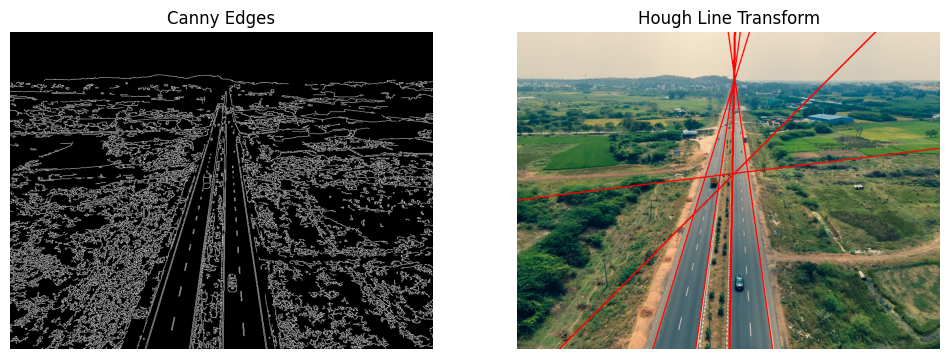

In [ ]:
# Draw infinite-length lines from Hough output
if lines is not None:
    for rho, theta in lines[:, 0]:

        # Convert polar coords (rho, theta) to Cartesian direction
        a = np.cos(theta)  # x-component of the unit direction vector
        b = np.sin(theta)  # y-component of the unit direction vector

        # (x0, y0) is the point on the line closest to the origin (0,0)
        x0 = a * rho
        y0 = b * rho

        # Extend the line far in both directions for drawing:
        # - Multiply perpendicular vector (-b, a) by a large number (1000 px)
        # - Add to and subtract from (x0, y0) to get two far-apart endpoints

        # First endpoint (go in the negative perpendicular direction)
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))

        # Second endpoint (go in the positive perpendicular direction)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Draw the line on the image in red (BGR: (0, 0, 255)) with thickness=2
        cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


# Showing results:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Hough Line Transform')
plt.axis('off')
plt.show()

### Hough Circle 

Image taken from: [link](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.fubiz.net%2F2014%2F12%2F01%2Fcircular-installations-in-nature%2Fcircular-installations-in-nature-4%2F&psig=AOvVaw1spe2pGe5UpjjlS1_xt7jM&ust=1757212963270000&source=images&cd=vfe&opi=89978449&ved=0CBUQjRxqFwoTCIj20cqOw48DFQAAAAAdAAAAABAY)

In [ ]:
# circles = cv.HoughCircles(
#     gray,                # input image (must be grayscale)
#     cv.HOUGH_GRADIENT,   # detection method (gradient-based Hough transform)
#     1,                   # inverse ratio of accumulator resolution to image resolution
#     500,                 # minimum distance between circle centers
#     param1=50,           # higher threshold for Canny edge detector (lower is half of this)
#     param2=30,           # accumulator threshold for circle centers
#     minRadius=0,         # minimum circle radius
#     maxRadius=0          # maximum circle radius (0 = no max limit)
# )

# Output format for HoughCircles
# [x_center, y_center, radius]


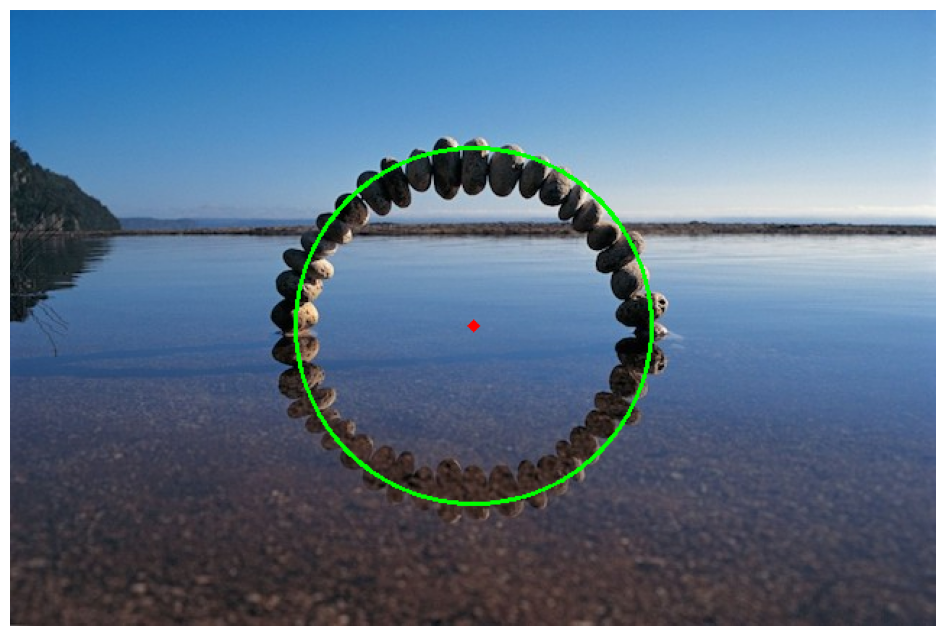

In [ ]:
img_path = 'assets/circle_1.jpg'

img = cv.imread(img_path)

assert img is not None, "file could not be read, check with os.path.exists"

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,500,
                            param1=100,param2=30,minRadius=0,maxRadius=0)
# param1 = higher threshold for Canny edge detector (lower is half of this)
# param2 = accumulator threshold for circle centers (lower = more false circles)

# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

# Showing results:
plt.figure(figsize=(12, 8))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
circles.shape

(1, 1, 3)

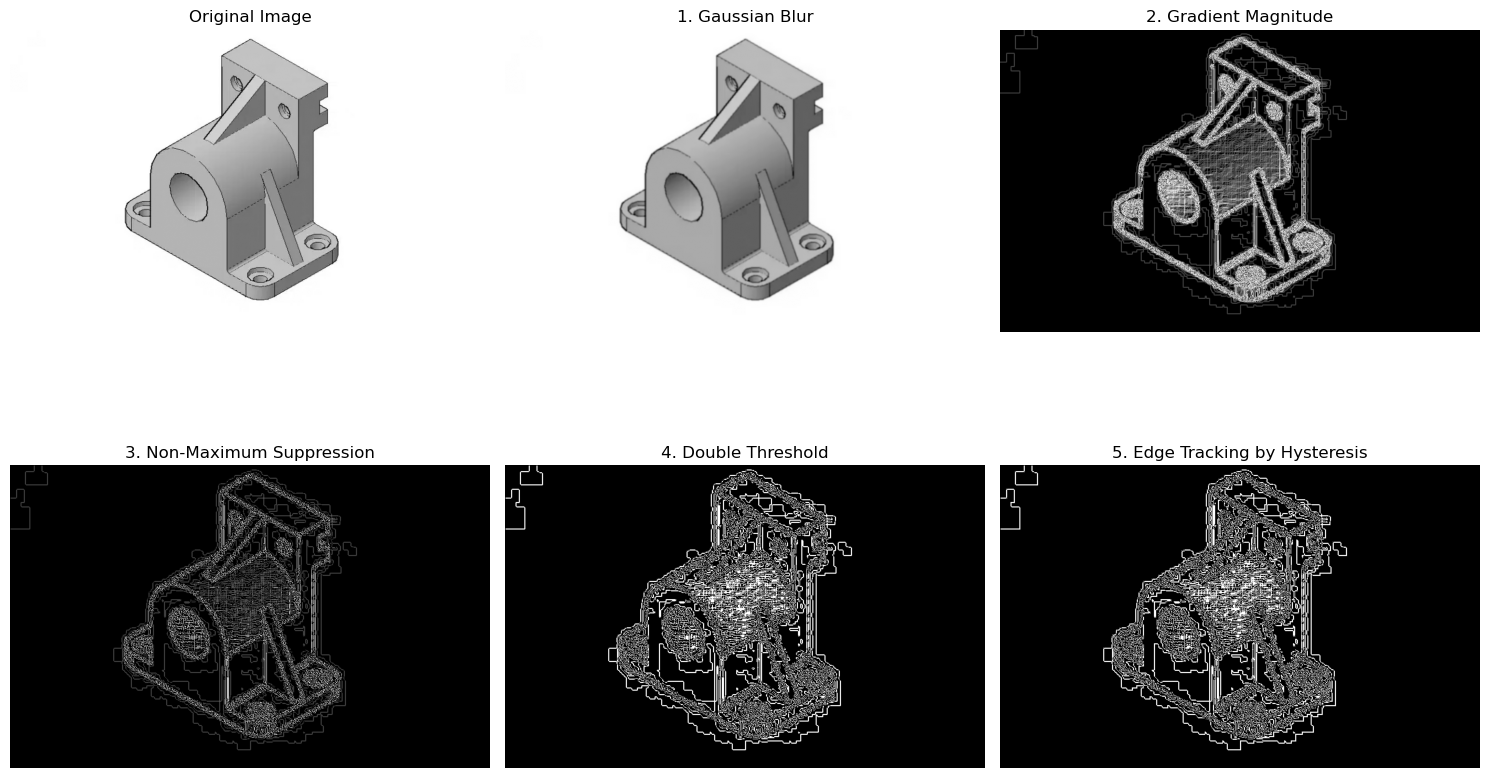

In [5]:
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

class CannyEdgeDetector:
    def __init__(self, image_path, sigma=1, low_threshold=0.05, high_threshold=0.15):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Error: Could not read image from path '{image_path}'")
        self.image = image
        self.sigma = sigma
        self.low_threshold = low_threshold
        self.high_threshold = high_threshold
        self.M, self.N = self.image.shape
        self.edges = np.zeros((self.M, self.N), dtype=np.uint8)

    def gaussian_blur(self):
        return ndimage.gaussian_filter(self.image, self.sigma)

    def sobel_filters(self, img):
        sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
        sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
        gradient_x = ndimage.convolve(img, sobel_x)
        gradient_y = ndimage.convolve(img, sobel_y)
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
        gradient_magnitude = gradient_magnitude / gradient_magnitude.max() * 255
        gradient_direction = np.arctan2(gradient_y, gradient_x) * 180 / np.pi
        gradient_direction[gradient_direction < 0] += 180
        return gradient_magnitude, gradient_direction

    def non_maximum_suppression(self, magnitude, direction):
        suppressed = np.zeros_like(magnitude)
        for i in range(1, self.M - 1):
            for j in range(1, self.N - 1):
                angle = direction[i, j]
                if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                    p1 = magnitude[i, j+1]
                    p2 = magnitude[i, j-1]
                elif (22.5 <= angle < 67.5):
                    p1 = magnitude[i-1, j+1]
                    p2 = magnitude[i+1, j-1]
                elif (67.5 <= angle < 112.5):
                    p1 = magnitude[i-1, j]
                    p2 = magnitude[i+1, j]
                else:
                    p1 = magnitude[i-1, j-1]
                    p2 = magnitude[i+1, j+1]
                if magnitude[i, j] >= p1 and magnitude[i, j] >= p2:
                    suppressed[i, j] = magnitude[i, j]
        return suppressed

    def double_threshold(self, img):
        high_threshold_val = img.max() * self.high_threshold
        low_threshold_val = high_threshold_val * self.low_threshold / self.high_threshold
        strong_edges = np.zeros_like(img, dtype=np.uint8)
        weak_edges = np.zeros_like(img, dtype=np.uint8)
        strong_edges[img >= high_threshold_val] = 255
        weak_edges[(img >= low_threshold_val) & (img < high_threshold_val)] = 75
        return strong_edges, weak_edges

    def hysteresis(self, strong_edges, weak_edges):
        final_edges = np.copy(strong_edges)
        for i in range(1, self.M - 1):
            for j in range(1, self.N - 1):
                if weak_edges[i, j] == 75:
                    if ((strong_edges[i+1, j-1] == 255) or (strong_edges[i+1, j] == 255) or
                        (strong_edges[i+1, j+1] == 255) or (strong_edges[i, j-1] == 255) or
                        (strong_edges[i, j+1] == 255) or (strong_edges[i-1, j-1] == 255) or
                        (strong_edges[i-1, j] == 255) or (strong_edges[i-1, j+1] == 255)):
                        final_edges[i, j] = 255
                    else:
                        final_edges[i, j] = 0
        return final_edges

if __name__ == '__main__':
    image_filename = 'assets/3d_drawings.jpg'

    try:
        canny_detector = CannyEdgeDetector(image_filename)
        original_image = canny_detector.image

        # Step 1: Noise Reduction
        smoothed = canny_detector.gaussian_blur()

        # Step 2: Gradient Calculation
        magnitude, direction = canny_detector.sobel_filters(smoothed)

        # Step 3: Non-Maximum Suppression
        suppressed = canny_detector.non_maximum_suppression(magnitude, direction)

        # Step 4: Double Thresholding
        strong_edges, weak_edges = canny_detector.double_threshold(suppressed)
        threshold_combined = strong_edges + weak_edges # For visualization

        # Step 5: Hysteresis
        final_edges = canny_detector.hysteresis(strong_edges, weak_edges)
        
        # Display the output of each step
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        
        axes[0, 0].imshow(original_image, cmap='gray')
        axes[0, 0].set_title('Original Image')
        axes[0, 0].axis('off')

        axes[0, 1].imshow(smoothed, cmap='gray')
        axes[0, 1].set_title('1. Gaussian Blur')
        axes[0, 1].axis('off')
        
        axes[0, 2].imshow(magnitude, cmap='gray')
        axes[0, 2].set_title('2. Gradient Magnitude')
        axes[0, 2].axis('off')
        
        axes[1, 0].imshow(suppressed, cmap='gray')
        axes[1, 0].set_title('3. Non-Maximum Suppression')
        axes[1, 0].axis('off')
        
        axes[1, 1].imshow(threshold_combined, cmap='gray')
        axes[1, 1].set_title('4. Double Threshold')
        axes[1, 1].axis('off')
        
        axes[1, 2].imshow(final_edges, cmap='gray')
        axes[1, 2].set_title('5. Edge Tracking by Hysteresis')
        axes[1, 2].axis('off')
        
        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)


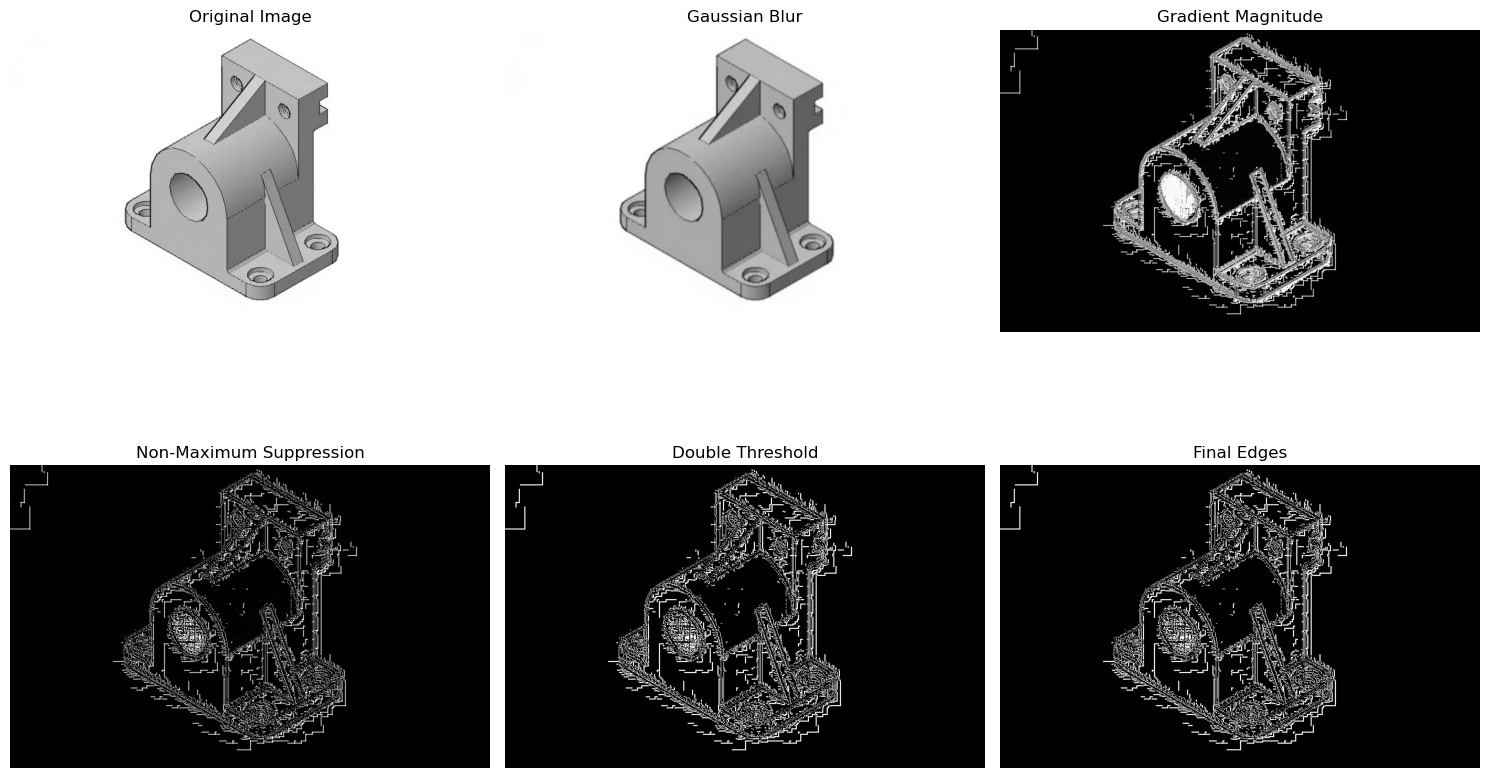

In [6]:
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

class CannyEdgeDetector:
    def __init__(self, image_path, sigma=1, low_threshold=0.05, high_threshold=0.15):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Error: Could not read image from path '{image_path}'")
        self.image = image
        self.sigma = sigma
        self.low_threshold = low_threshold
        self.high_threshold = high_threshold

    # -----------------------------
    # Step 1: Gaussian Blur
    # -----------------------------
    def gaussian_blur(self):
        return ndimage.gaussian_filter(self.image, self.sigma)

    # -----------------------------
    # Step 2: Gradient Magnitude & Direction
    # -----------------------------
    def sobel_filters(self, img):
        sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
        sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
        Gx = ndimage.convolve(img, sobel_x)
        Gy = ndimage.convolve(img, sobel_y)
        magnitude = np.hypot(Gx, Gy)
        magnitude = (magnitude / magnitude.max()) * 255
        direction = np.arctan2(Gy, Gx) * 180 / np.pi
        direction[direction < 0] += 180
        return magnitude, direction

    # -----------------------------
    # Step 3: Non-Maximum Suppression (Vectorized)
    # -----------------------------
    def non_maximum_suppression(self, magnitude, direction):
        M, N = magnitude.shape
        Z = np.zeros((M, N), dtype=np.float32)
        angle = direction.copy()
        angle[angle < 0] += 180

        # Round angle to 4 main directions: 0, 45, 90, 135
        angle = (np.round(angle / 45) * 45) % 180

        # Pad the image to avoid boundary issues
        mag_padded = np.pad(magnitude, ((1,1),(1,1)), mode='constant')

        # Compare neighbors based on direction
        for i in range(1, M+1):
            for j in range(1, N+1):
                q = 255
                r = 255
                if angle[i-1, j-1] == 0:
                    q = mag_padded[i, j+1]
                    r = mag_padded[i, j-1]
                elif angle[i-1, j-1] == 45:
                    q = mag_padded[i-1, j+1]
                    r = mag_padded[i+1, j-1]
                elif angle[i-1, j-1] == 90:
                    q = mag_padded[i-1, j]
                    r = mag_padded[i+1, j]
                elif angle[i-1, j-1] == 135:
                    q = mag_padded[i-1, j-1]
                    r = mag_padded[i+1, j+1]
                if mag_padded[i, j] >= q and mag_padded[i, j] >= r:
                    Z[i-1, j-1] = mag_padded[i, j]
        return Z

    # -----------------------------
    # Step 4: Double Threshold
    # -----------------------------
    def double_threshold(self, img):
        high_val = img.max() * self.high_threshold
        low_val = img.max() * self.low_threshold
        strong_edges = np.zeros_like(img, dtype=np.uint8)
        weak_edges = np.zeros_like(img, dtype=np.uint8)
        strong_edges[img >= high_val] = 255
        weak_edges[(img >= low_val) & (img < high_val)] = 75
        return strong_edges, weak_edges

    # -----------------------------
    # Step 5: Edge Tracking by Hysteresis (Vectorized)
    # -----------------------------
    def hysteresis(self, strong_edges, weak_edges):
        M, N = strong_edges.shape
        final_edges = strong_edges.copy()
        # Identify weak pixels that have strong neighbors
        shift_coords = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]
        weak_y, weak_x = np.where(weak_edges == 75)
        for y, x in zip(weak_y, weak_x):
            for dy, dx in shift_coords:
                ny, nx = y+dy, x+dx
                if 0 <= ny < M and 0 <= nx < N:
                    if strong_edges[ny, nx] == 255:
                        final_edges[y, x] = 255
                        break
        return final_edges

    # -----------------------------
    # Full Pipeline
    # -----------------------------
    def process(self):
        smoothed = self.gaussian_blur()
        magnitude, direction = self.sobel_filters(smoothed)
        suppressed = self.non_maximum_suppression(magnitude, direction)
        strong, weak = self.double_threshold(suppressed)
        final_edges = self.hysteresis(strong, weak)
        return smoothed, magnitude, suppressed, strong, weak, final_edges


# -----------------------------
# Run Example
# -----------------------------
if __name__ == '__main__':
    image_filename = 'assets/3d_drawings.jpg'

    try:
        detector = CannyEdgeDetector(image_filename)
        smoothed, magnitude, suppressed, strong, weak, final_edges = detector.process()

        fig, axes = plt.subplots(2, 3, figsize=(15, 10))

        titles = ['Original Image', 'Gaussian Blur', 'Gradient Magnitude',
                  'Non-Maximum Suppression', 'Double Threshold', 'Final Edges']
        images = [detector.image, smoothed, magnitude,
                  suppressed, strong+weak, final_edges]

        for ax, img, title in zip(axes.ravel(), images, titles):
            ax.imshow(img, cmap='gray')
            ax.set_title(title)
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)


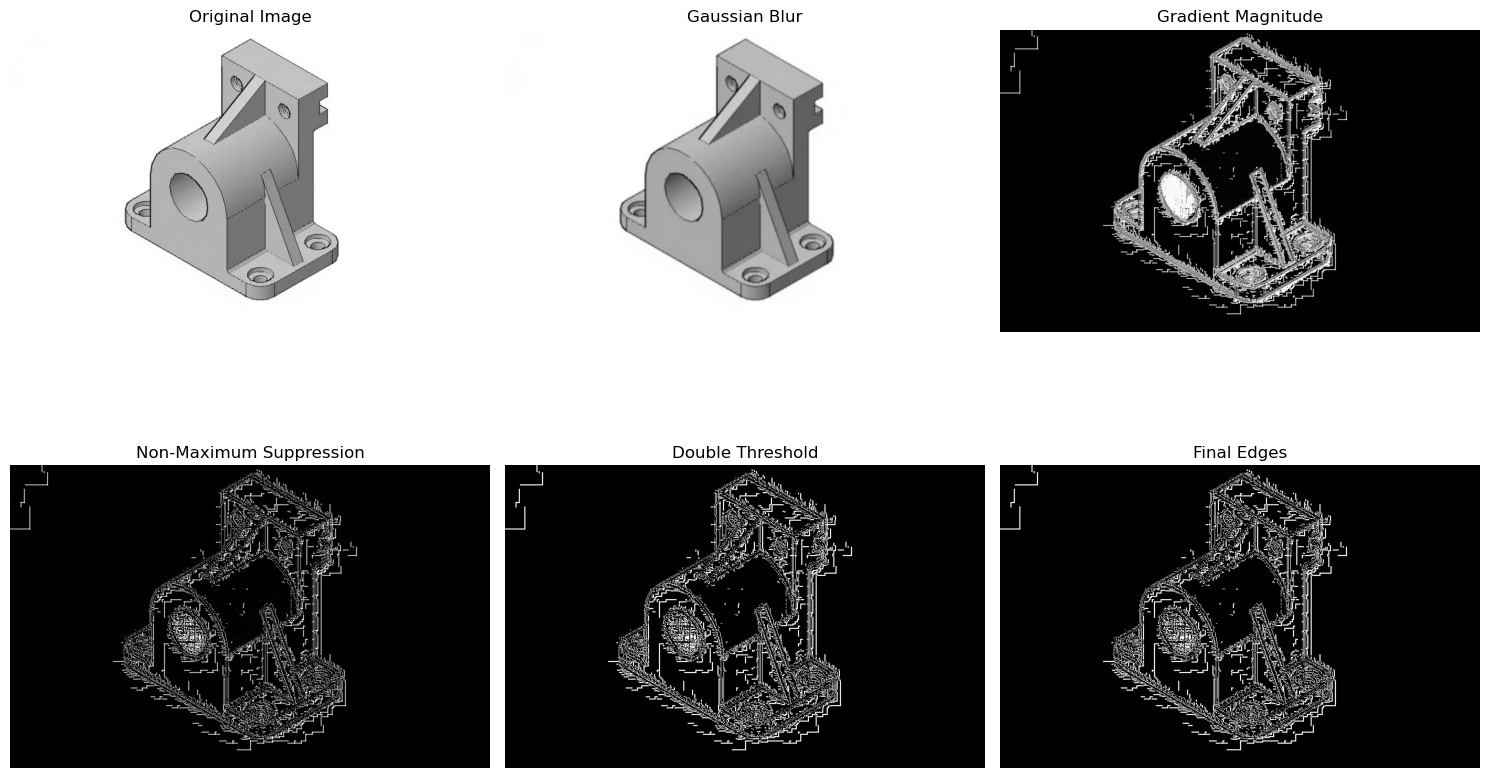

In [7]:
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

class CannyEdgeDetector:
    def __init__(self, image_path, sigma=1, low_threshold=0.05, high_threshold=0.15):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Error: Could not read image from path '{image_path}'")
        self.image = image
        self.sigma = sigma
        self.low_threshold = low_threshold
        self.high_threshold = high_threshold

    # -----------------------------
    # Step 1: Gaussian Blur
    # -----------------------------
    def gaussian_blur(self):
        return ndimage.gaussian_filter(self.image, self.sigma)

    # -----------------------------
    # Step 2: Gradient Magnitude & Direction
    # -----------------------------
    def sobel_filters(self, img):
        sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
        sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
        Gx = ndimage.convolve(img, sobel_x)
        Gy = ndimage.convolve(img, sobel_y)
        magnitude = np.hypot(Gx, Gy)
        magnitude = (magnitude / magnitude.max()) * 255
        direction = np.arctan2(Gy, Gx) * 180 / np.pi
        direction[direction < 0] += 180
        return magnitude, direction

    # -----------------------------
    # Step 3: Non-Maximum Suppression (Vectorized)
    # -----------------------------
    def non_maximum_suppression(self, magnitude, direction):
        M, N = magnitude.shape
        Z = np.zeros((M, N), dtype=np.float32)
        angle = direction.copy()
        angle[angle < 0] += 180

        # Round angle to 4 main directions: 0, 45, 90, 135
        angle = (np.round(angle / 45) * 45) % 180

        # Pad the image to avoid boundary issues
        mag_padded = np.pad(magnitude, ((1,1),(1,1)), mode='constant')

        # Compare neighbors based on direction
        for i in range(1, M+1):
            for j in range(1, N+1):
                q = 255
                r = 255
                if angle[i-1, j-1] == 0:
                    q = mag_padded[i, j+1]
                    r = mag_padded[i, j-1]
                elif angle[i-1, j-1] == 45:
                    q = mag_padded[i-1, j+1]
                    r = mag_padded[i+1, j-1]
                elif angle[i-1, j-1] == 90:
                    q = mag_padded[i-1, j]
                    r = mag_padded[i+1, j]
                elif angle[i-1, j-1] == 135:
                    q = mag_padded[i-1, j-1]
                    r = mag_padded[i+1, j+1]
                if mag_padded[i, j] >= q and mag_padded[i, j] >= r:
                    Z[i-1, j-1] = mag_padded[i, j]
        return Z

    # -----------------------------
    # Step 4: Double Threshold
    # -----------------------------
    def double_threshold(self, img):
        high_val = img.max() * self.high_threshold
        low_val = img.max() * self.low_threshold
        strong_edges = np.zeros_like(img, dtype=np.uint8)
        weak_edges = np.zeros_like(img, dtype=np.uint8)
        strong_edges[img >= high_val] = 255
        weak_edges[(img >= low_val) & (img < high_val)] = 75
        return strong_edges, weak_edges

    # -----------------------------
    # Step 5: Edge Tracking by Hysteresis (Vectorized)
    # -----------------------------
    def hysteresis(self, strong_edges, weak_edges):
        M, N = strong_edges.shape
        final_edges = strong_edges.copy()
        # Identify weak pixels that have strong neighbors
        shift_coords = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]
        weak_y, weak_x = np.where(weak_edges == 75)
        for y, x in zip(weak_y, weak_x):
            for dy, dx in shift_coords:
                ny, nx = y+dy, x+dx
                if 0 <= ny < M and 0 <= nx < N:
                    if strong_edges[ny, nx] == 255:
                        final_edges[y, x] = 255
                        break
        return final_edges

    # -----------------------------
    # Full Pipeline
    # -----------------------------
    def process(self):
        smoothed = self.gaussian_blur()
        magnitude, direction = self.sobel_filters(smoothed)
        suppressed = self.non_maximum_suppression(magnitude, direction)
        strong, weak = self.double_threshold(suppressed)
        final_edges = self.hysteresis(strong, weak)
        return smoothed, magnitude, suppressed, strong, weak, final_edges

# -----------------------------
# Run Example
# -----------------------------
if __name__ == '__main__':
    image_filename = 'assets/3d_drawings.jpg'

    try:
        detector = CannyEdgeDetector(image_filename)
        smoothed, magnitude, suppressed, strong, weak, final_edges = detector.process()

        fig, axes = plt.subplots(2, 3, figsize=(15, 10))

        titles = ['Original Image', 'Gaussian Blur', 'Gradient Magnitude',
                  'Non-Maximum Suppression', 'Double Threshold', 'Final Edges']
        images = [detector.image, smoothed, magnitude,
                  suppressed, strong+weak, final_edges]

        for ax, img, title in zip(axes.ravel(), images, titles):
            ax.imshow(img, cmap='gray')
            ax.set_title(title)
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)


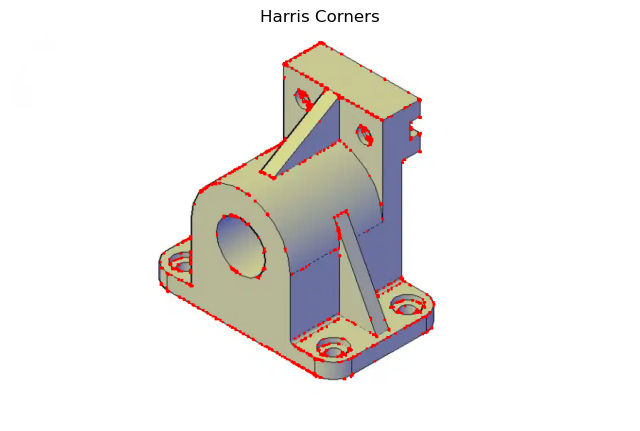

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

class HarrisCornerDetector:
    def __init__(self, image_path, block_size=2, ksize=3, k=0.04, threshold=0.01):
        """
        Parameters:
        - image_path: path to the image
        - block_size: neighborhood size for Harris detector
        - ksize: aperture parameter for Sobel operator
        - k: Harris detector free parameter
        - threshold: fraction of max response to consider a corner
        """
        self.image_path = image_path
        self.block_size = block_size
        self.ksize = ksize
        self.k = k
        self.threshold = threshold

        # Load image
        self.image = cv.imread(image_path)
        if self.image is None:
            raise FileNotFoundError(f"Could not read image from '{image_path}'")
        self.gray = cv.cvtColor(self.image, cv.COLOR_BGR2GRAY)

        # Harris response and corners
        self.harris_response = None
        self.corners = None

    # Step 1: Compute Harris response
    def compute_harris(self):
        self.harris_response = cv.cornerHarris(
            np.float32(self.gray),
            blockSize=self.block_size,
            ksize=self.ksize,
            k=self.k
        )
        # Dilate for marking corners
        self.harris_response = cv.dilate(self.harris_response, None)

    # Step 2: Detect corners based on threshold
    def detect_corners(self):
        if self.harris_response is None:
            raise ValueError("Harris response not computed. Call compute_harris() first.")
        threshold_value = self.threshold * self.harris_response.max()
        self.corners = np.zeros_like(self.gray, dtype=np.uint8)
        self.corners[self.harris_response > threshold_value] = 255

    # Step 3: Visualize corners
    def draw_corners(self):
        if self.corners is None:
            raise ValueError("Corners not detected. Call detect_corners() first.")
        img_copy = self.image.copy()
        img_copy[self.corners == 255] = [0, 0, 255]  # mark corners in red
        plt.figure(figsize=(8, 6))
        plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Harris Corners")
        plt.show()

    # Step 4: Full pipeline
    def process(self):
        self.compute_harris()
        self.detect_corners()
        self.draw_corners()


# -----------------------------
# Example Usage
# -----------------------------
if __name__ == '__main__':
    image_path = 'assets/3d_drawings.jpg'  # Replace with your image path
    detector = HarrisCornerDetector(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01)
    detector.process()
